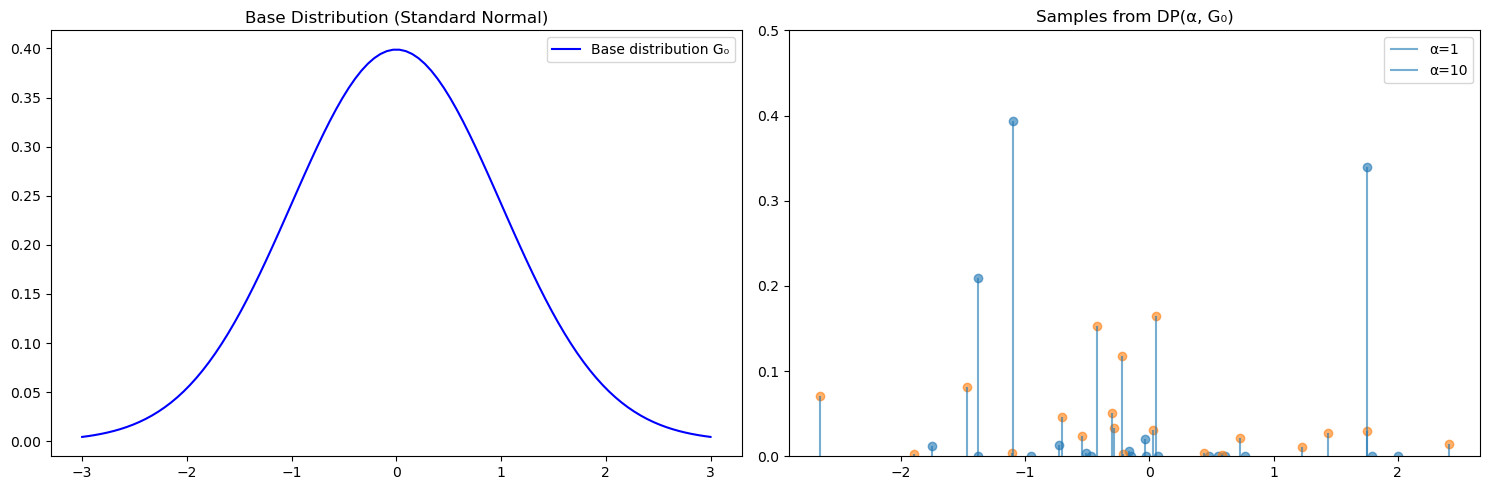

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def stick_breaking(alpha, n):
    """使用stick-breaking过程生成权重"""
    betas = np.random.beta(1, alpha, n)
    weights = np.zeros(n)
    
    remaining = 1.0
    for i in range(n):
        weights[i] = remaining * betas[i]
        remaining *= (1 - betas[i])
    
    return weights

# 设置参数
n_points = 20  # 我们只取前20个点
x = np.linspace(-3, 3, 100)

# 创建图形
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 绘制基分布G₀
axes[0].plot(x, norm.pdf(x), 'b-', label='Base distribution G₀')
axes[0].set_title('Base Distribution (Standard Normal)')
axes[0].legend()

# 从DP中抽样
alphas = [1, 10]
for alpha in alphas:
    # 生成位置和权重
    locations = np.random.normal(0, 1, n_points)  # 从G₀抽样位置
    weights = stick_breaking(alpha, n_points)      # 生成权重
    
    # 绘制抽样得到的分布G
    ax = axes[1]
    ax.vlines(locations, 0, weights, alpha=0.6, label=f'α={alpha}')
    ax.scatter(locations, weights, alpha=0.6)
    
axes[1].set_title('Samples from DP(α, G₀)')
axes[1].legend()
axes[1].set_ylim(0, 0.5)

plt.tight_layout()
plt.show()